<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_python/2_2_Cats_Dogs_Augmentation_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2-2주차 Cats v Dogs Augmentation

이제 각각 32, 64, 128 및 128 컨볼 루션이있는 4 개의 컨볼 루션 레이어가 존재

손실과 정확도의 그래프를 그리고 100 epoch 동안 훈련 될 것

결과는 Augmentation+ Dropout 추가할 때가 가장 좋다.

예제 1. Augmentation 없을 때


In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-05-06 14:33:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  25.3MB/s    in 2.6s    

2021-05-06 14:34:02 (25.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [6]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 42s - loss: 0.6882 - accuracy: 0.5290 - val_loss: 0.6852 - val_accuracy: 0.5290
Epoch 2/100
100/100 - 8s - loss: 0.6599 - accuracy: 0.6150 - val_loss: 0.6662 - val_accuracy: 0.5790
Epoch 3/100
100/100 - 8s - loss: 0.6198 - accuracy: 0.6500 - val_loss: 0.6010 - val_accuracy: 0.6930
Epoch 4/100
100/100 - 8s - loss: 0.5672 - accuracy: 0.7080 - val_loss: 0.6026 - val_accuracy: 0.6750
Epoch 5/100
100/100 - 8s - loss: 0.5294 - accuracy: 0.7285 - val_loss: 0.5667 - val_accuracy: 0.7190
Epoch 6/100
100/100 - 8s - loss: 0.5040 - accuracy: 0.7460 - val_loss: 0.5744 - val_accuracy: 0.7040
Epoch 7/100
100/100 - 8s - loss: 0.4775 - accuracy: 0.7685 - val_loss: 0.5443 - val_accuracy: 0.7390
Epoch 8/100
100/100 - 8s - loss: 0.4544 - accuracy: 0.7825 - val_loss: 0.5459 - val_accuracy: 0.7340
Epoch 9/100
100/100 - 8s - loss: 0.4221 - accuracy: 0.8010 - val_loss: 0.5568 - val_accuracy: 0.7280
Epoch 10/100
100/100 - 8s - loss: 0.3964 - accuracy: 0.8295 - val_loss: 0.5471 - val_accur

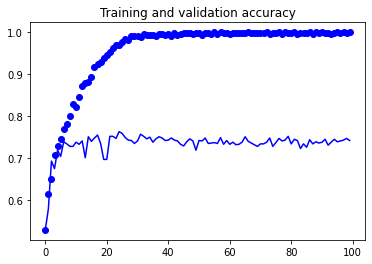

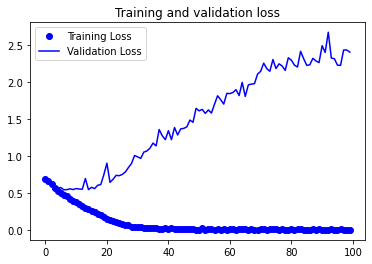

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

예제 1 은 훈련 정확도는 100 %에 가깝고 검증 정확도는 70 % -80 % 범위, 과적 합의 훌륭한 예

이미지를 약간 조정하여 이미지를 약간 변경하면 어떨까요? 이미지를 회전하고 스쿼시하는 등의 작업을 수행 할 수 있습니다. 

이것이 바로 이미지 확대에 관한 것입니다. 그리고 쉽게 만드는 API가 있습니다.

rotation_range는 그림을 임의로 회전 할 범위 인 각도 (0-180) 값입니다.

width_shift 및 height_shift는 그림을 세로 또는 가로로 무작위로 번역 할 범위 (총 너비 또는 높이의 일부)입니다.

shear_range는 전단 변환을 무작위로 적용하기위한 것입니다.

zoom_range는 사진 내부를 무작위로 확대하기위한 것입니다.

horizontal_flip은 이미지의 절반을 가로로 무작위로 뒤집기위한 것입니다. 이것은 수평 비대칭에 대한 가정이 없을 때 관련됩니다 (예 : 실제 그림).

fill_mode는 새로 생성 된 픽셀을 채우는 데 사용되는 전략으로, 회전 또는 너비 / 높이 이동 후에 나타날 수 있습니다.

예제 2. Image Augmentation을 추가 한 코드입니다. 영향을 확인하려면 실행하십시오.

In [11]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-05-06 14:48:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   203MB/s    in 0.3s    

2021-05-06 14:48:25 (203 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [13]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [16]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 18s - loss: 0.6908 - accuracy: 0.5290 - val_loss: 0.6819 - val_accuracy: 0.5010
Epoch 2/100
100/100 - 17s - loss: 0.6825 - accuracy: 0.5435 - val_loss: 0.6556 - val_accuracy: 0.6040
Epoch 3/100
100/100 - 17s - loss: 0.6634 - accuracy: 0.5970 - val_loss: 0.6373 - val_accuracy: 0.6310
Epoch 4/100
100/100 - 17s - loss: 0.6497 - accuracy: 0.6180 - val_loss: 0.6218 - val_accuracy: 0.6420
Epoch 5/100
100/100 - 17s - loss: 0.6371 - accuracy: 0.6320 - val_loss: 0.5926 - val_accuracy: 0.6900
Epoch 6/100
100/100 - 17s - loss: 0.6221 - accuracy: 0.6500 - val_loss: 0.7028 - val_accuracy: 0.5540
Epoch 7/100
100/100 - 17s - loss: 0.6048 - accuracy: 0.6685 - val_loss: 0.5715 - val_accuracy: 0.6870
Epoch 8/100
100/100 - 17s - loss: 0.5999 - accuracy: 0.6795 - val_loss: 0.5531 - val_accuracy: 0.7200
Epoch 9/100
100/100 - 17s - loss: 0.5894 - accuracy: 0.6745 - val_loss: 0.5504 - val_accuracy: 0.7200
Epoch 10/100
100/100 - 17s - loss: 0.5900 - accuracy: 0.6930 - val_loss: 0.5554 - 

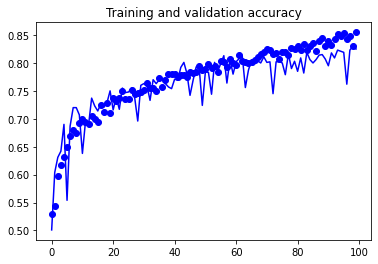

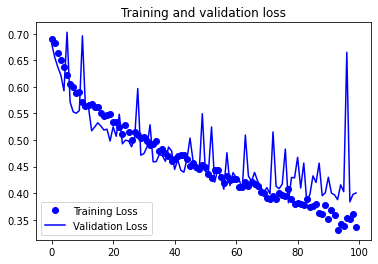

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

예제3. Dropout을 넣었을 때 결과가 가장 좋다. Flatten() 바로 전에 추가

In [19]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-05-06 15:16:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  86.6MB/s    in 0.8s    

2021-05-06 15:16:17 (86.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [21]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [24]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 18s - loss: 0.6946 - accuracy: 0.5080 - val_loss: 0.6828 - val_accuracy: 0.5190
Epoch 2/100
100/100 - 17s - loss: 0.6829 - accuracy: 0.5655 - val_loss: 0.6542 - val_accuracy: 0.6090
Epoch 3/100
100/100 - 16s - loss: 0.6699 - accuracy: 0.5880 - val_loss: 0.6388 - val_accuracy: 0.6170
Epoch 4/100
100/100 - 17s - loss: 0.6562 - accuracy: 0.5955 - val_loss: 0.7834 - val_accuracy: 0.5220
Epoch 5/100
100/100 - 17s - loss: 0.6501 - accuracy: 0.6095 - val_loss: 0.6008 - val_accuracy: 0.6920
Epoch 6/100
100/100 - 17s - loss: 0.6344 - accuracy: 0.6350 - val_loss: 0.5905 - val_accuracy: 0.6900
Epoch 7/100
100/100 - 17s - loss: 0.6142 - accuracy: 0.6595 - val_loss: 0.5721 - val_accuracy: 0.6950
Epoch 8/100
100/100 - 17s - loss: 0.6100 - accuracy: 0.6500 - val_loss: 0.5582 - val_accuracy: 0.7240
Epoch 9/100
100/100 - 17s - loss: 0.6020 - accuracy: 0.6750 - val_loss: 0.6586 - val_accuracy: 0.5920
Epoch 10/100
100/100 - 17s - loss: 0.5869 - accuracy: 0.6815 - val_loss: 0.5408 - 

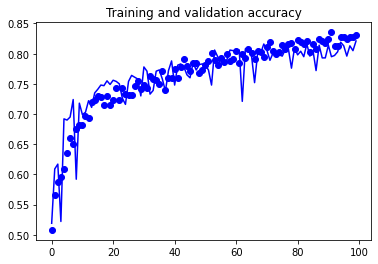

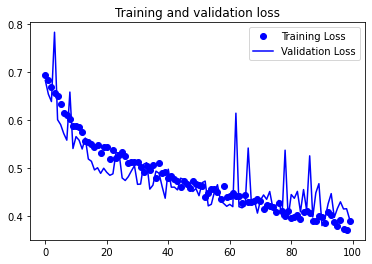

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()